# 1. Binary Classification Example

In [2]:
from mikegrad.nn import MLP

In [21]:
mlp = MLP(nin=3, 
          nouts=[4, 4, 1])
mlp

In [22]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
#ys = [1.0, 0.0, 0.0, 1.0] # desired targets
ys = [1.0, 0.0, 0.0, 1.0] # desired targets

In [23]:
def train(mlp, xs, ys, lr=1e-2, nepochs=100):
    for i in range(nepochs):
        ypred = [mlp(x) for x in xs]
        loss = sum([(yp - yt)**2 for yp, yt in zip(ypred, ys)]) # mse loss
        # print(f"Epoch [{i+1}/{nepochs}] | Loss: {loss.data:.6f}")
        for p in mlp.parameters():
            p.grad = 0.0
        loss.backward()
        for p in mlp.parameters():
            p.data -= lr * p.grad    

            
lr=0.1
nepochs=1000
train(mlp, xs, ys, lr, nepochs)

In [24]:
ypred = [mlp(x) for x in xs]
loss = sum([(yp - yt)**2 for yp, yt in zip(ypred, ys)])
print(f"Loss: {loss.data:.6f}")

Loss: 0.008938


# 2. Regression Example

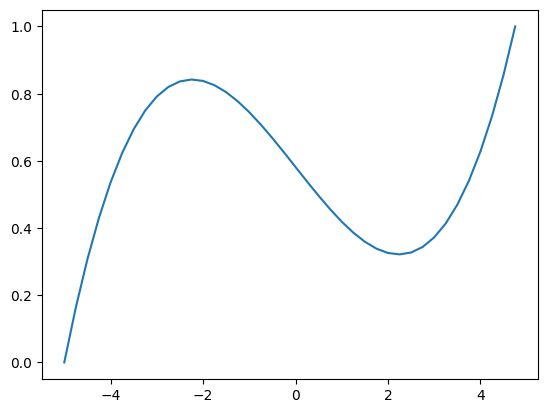

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1/5)*x**3 - 3*x + 4

xs = np.arange(-5, 5, 0.25)
ys = f(xs)
# min max scaling to ys to be in [0, 1]
ys = (ys - ys.min())/(ys.max() - ys.min())

plt.plot(xs, ys)

In [26]:
xs = [[x] for x in xs]
mlp = MLP(1, [8, 1])
lr=0.05
nepochs=5000

train(mlp, xs, ys, lr, nepochs)

In [31]:
y_preds = [mlp(x) for x in xs]

loss = sum([(yp - yt)**2 for yp, yt in zip(y_preds, ys)])
print(f"Loss: {loss.data:.6f}")

Loss: 0.102520


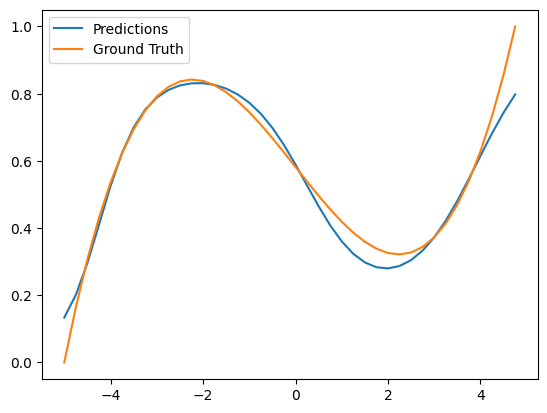

In [34]:
plt.plot(xs, [y.data for y in y_preds])
plt.plot(xs, ys)
plt.legend(['Predictions', 'Ground Truth'])